In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import UnivariateSpline
from scipy.optimize import curve_fit
from scipy import stats

In [2]:
#arrays replicas
cfp1=np.fromfile('CFPE8', sep=',')
rfp1=np.fromfile('RFPE8', sep=',')
yfp1=np.fromfile('YFPE8', sep=',')
od1=np.fromfile('ODE8', sep=',')
cfp2=np.fromfile('CFPE9', sep=',')
rfp2=np.fromfile('RFPE9', sep=',')
yfp2=np.fromfile('YFPE9', sep=',')
od2=np.fromfile('ODE9', sep=',')
cfp3=np.fromfile('CFPE10', sep=',')
rfp3=np.fromfile('RFPE10', sep=',')
yfp3=np.fromfile('YFPE10', sep=',')
od3=np.fromfile('ODE10', sep=',')
cfp4=np.fromfile('CFPE11', sep=',')
rfp4=np.fromfile('RFPE11', sep=',')
yfp4=np.fromfile('YFPE11', sep=',')
od4=np.fromfile('ODE11', sep=',')
cfp5=np.fromfile('CFPE12', sep=',')
rfp5=np.fromfile('RFPE12', sep=',')
yfp5=np.fromfile('YFPE12', sep=',')
od5=np.fromfile('ODE12', sep=',')
cfp6=np.fromfile('CFPF8', sep=',')
rfp6=np.fromfile('RFPF8', sep=',')
yfp6=np.fromfile('YFPF8', sep=',')
od6=np.fromfile('ODF8', sep=',')
cfp7=np.fromfile('CFPF9', sep=',')
rfp7=np.fromfile('RFPF9', sep=',')
yfp7=np.fromfile('YFPF9', sep=',')
od7=np.fromfile('ODF9', sep=',')
cfp8=np.fromfile('CFPF10', sep=',')
rfp8=np.fromfile('RFPF10', sep=',')
yfp8=np.fromfile('YFPF10', sep=',')
od8=np.fromfile('ODF10', sep=',')
cfp9=np.fromfile('CFPF11', sep=',')
rfp9=np.fromfile('RFPF11', sep=',')
yfp9=np.fromfile('YFPF11', sep=',')
od9=np.fromfile('ODF11', sep=',')
cfp10=np.fromfile('CFPF12', sep=',')
rfp10=np.fromfile('RFPF12', sep=',')
yfp10=np.fromfile('YFPF12', sep=',')
od10=np.fromfile('ODF12', sep=',')
tt=np.fromfile('t', sep=',')

#Controles
#Promedios controles glicerol
cfpc=np.fromfile('pcglCFP', sep=',')
rfpc=np.fromfile('pcglRFP', sep=',')
yfpc=np.fromfile('pcglYFP', sep=',')
odc=np.fromfile('pcglOD', sep=',')

#Promedio arrays y desv estándar
cfpp=np.fromfile('ppssglCFP', sep=',')
rfpp=np.fromfile('ppssglRFP', sep=',')
yfpp=np.fromfile('ppssglYFP', sep=',')
odp=np.fromfile('ppssglOD', sep=',')
print(cfpp.shape)
print(rfpp.shape)
print(yfpp.shape)
print(odp.shape)
print(tt.shape)

(97,)
(97,)
(97,)
(97,)
(97,)


In [3]:
#Funciones para ajuste Gompertz
def F_sigma(t, A, um,l):
    return ((A*np.exp(-np.exp((((um*np.exp(1))/A)*(l-t))+1))))

def Function_fit(xdata,ydata,init,end,func=F_sigma,ParamBounds=([0,0,0],[3,1,300])):
        Y_fit={}

        z,_=curve_fit(func,xdata[init:end], ydata[init:end],bounds=ParamBounds)

        print(z)

        evalF=func(xdata,z[0],z[1],z[2])

        plt.plot(xdata, ydata, '.',xdata, evalF, '-')

        plt.title('')

        plt.show()

        Y_fit=evalF,z

        return(Y_fit)


Min OD = 8.300000e-02
[  2.22470400e+00   5.15858083e-03   2.32096924e+02]


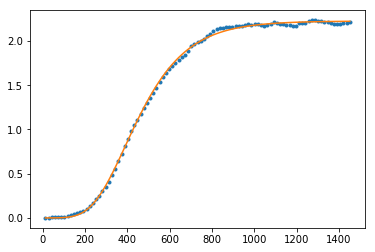

A=2.224704e+00
um=5.158581e-03
l=2.320969e+02
Tm=3.907496e+02
doubpe=1.343678e+02
ext=3.359195e+02
Tfinal=7.266692e+02


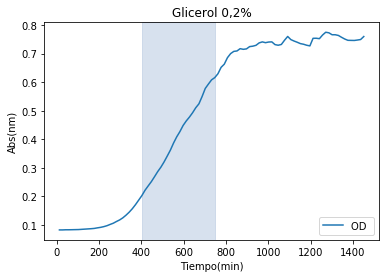

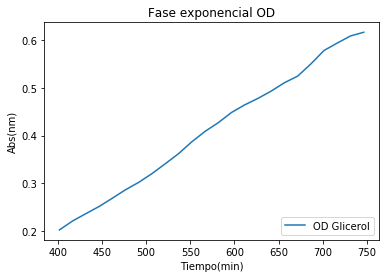

In [6]:
#Ajuste de datos con modelo Gompertz y obtención de parámetros para el ajuste
#control glicerol
yc = np.log(odc)-np.log(np.min(odc))
print('Min OD = %e'%((np.min(odc))))
evaly, params=Function_fit(tt,yc,0,-1)
Ac = params[0]
umc=params[1]
lc=params[2]
print('A=%e'%(Ac))
print('um=%e'%(umc))
print('l=%e'%(lc))

#Cálculo datos para determinar extensión de la fase exponencial
tmc=((Ac/(np.exp(1)*umc))+lc)
print('Tm=%e'%(tmc))
t2c=((np.log(2))/umc)
print('doubpe=%e'%(t2c))
extdpc=2.5*t2c
print('ext=%e'%extdpc)
ttotc=tmc+extdpc
print('Tfinal=%e'%ttotc)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[26]
y2=tt[49]
plt.figure()
plt.title('Glicerol 0,2%')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,odc,label='OD ')
plt.axvspan(y1,y2, color='lightsteelblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo
plt.figure()
plt.title('Fase exponencial OD')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[26:50],odc[26:50],label='OD Glicerol')
plt.legend(loc='lower right')

Min OD = 8.350000e-02
[  2.26948963e+00   5.14262207e-03   3.00000000e+02]


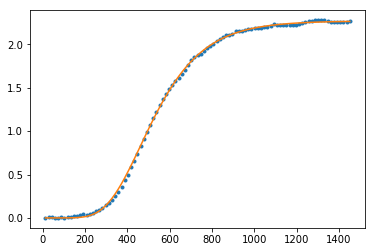

A=2.269490e+00
um=5.142622e-03
l=3.000000e+02
Tm=4.623488e+02
doubpe=1.347848e+02
ext=3.369619e+02
Tfinal=7.993108e+02


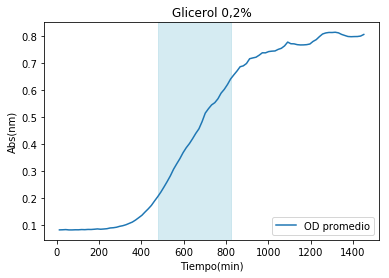

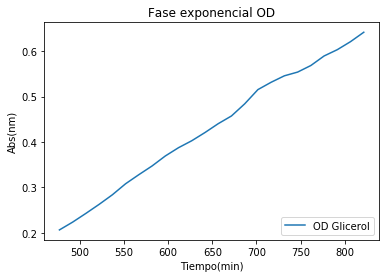

In [74]:
#Ajuste de datos con modelo Gompertz y obtención de parámetros para el ajuste
#promedio
y = np.log(odp)-np.log(np.min(odp))
print('Min OD = %e'%((np.min(odp))))
evaly, params=Function_fit(tt,y,0,-1)
A = params[0]
um=params[1]
l=params[2]
print('A=%e'%(A))
print('um=%e'%(um))
print('l=%e'%(l))

#Cálculo datos para determinar extensión de la fase exponencial
tm=((A/(np.exp(1)*um))+l)
print('Tm=%e'%(tm))
t2=((np.log(2))/um)
print('doubpe=%e'%(t2))
extdp=2.5*t2
print('ext=%e'%extdp)
ttot=tm+extdp
print('Tfinal=%e'%ttot)
##Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[31]
y2=tt[54]
plt.figure()
plt.title('Glicerol 0,2%')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,odp,label='OD promedio')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo
plt.figure()
plt.title('Fase exponencial OD')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[31:55],odp[31:55],label='OD Glicerol')
plt.legend(loc='lower right')

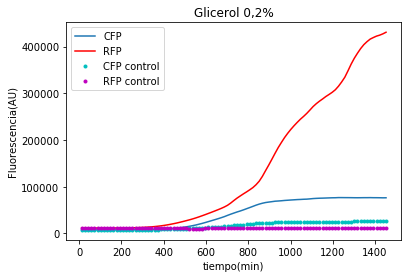

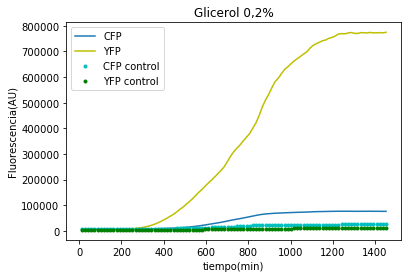

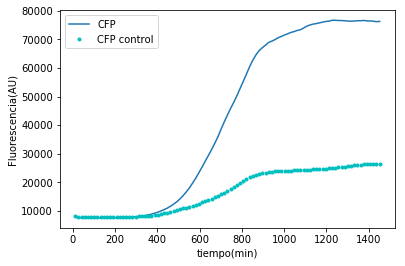

In [8]:
#promedios fluorescencia vs t
plt.figure()
plt.title('Glicerol 0,2%')
plt.xlabel('tiempo(min)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(tt,cfpp, label='CFP')
plt.plot(tt,rfpp,'r',label='RFP')
plt.plot(tt,cfpc,'c.', label='CFP control')
plt.plot(tt,rfpc,'m.',label='RFP control')
plt.legend(loc='upper left')

plt.figure()
plt.title('Glicerol 0,2%')
plt.xlabel('tiempo(min)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(tt,cfpp, label='CFP')
plt.plot(tt,yfpp,'y',label='YFP')
plt.plot(tt,cfpc,'c.', label='CFP control')
plt.plot(tt,yfpc,'g.',label='YFP control')
plt.legend(loc='upper left')
plt.figure()
plt.xlabel('tiempo(min)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(tt,cfpp, label='CFP')
plt.plot(tt,cfpc,'c.', label='CFP control')
plt.legend(loc='upper left')

[  2.36588219e+00   5.15773070e-03   3.00000000e+02]


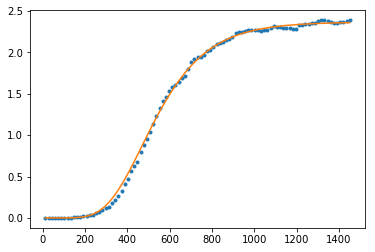

A=2.365882e+00
um=5.157731e-03
l=3.000000e+02
Tm=4.687485e+02
doubpe=1.343900e+02
ext=3.359749e+02
Tfinal=8.047234e+02


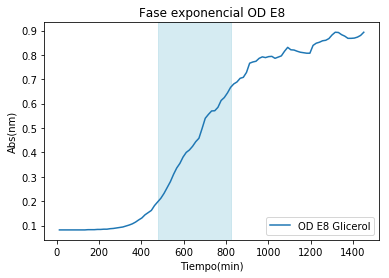

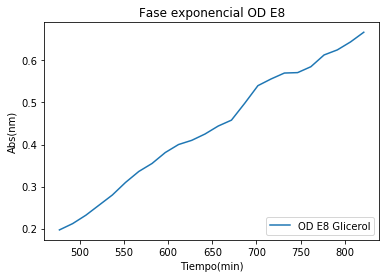

In [75]:
#Ajuste de datos con modelo Gompertz y obtención de parámetros para el ajuste
#E8
y1 = np.log(od1)-np.log(np.min(od1))
evaly, params=Function_fit(tt,y1,0,-1)
A1 = params[0]
um1=params[1]
l1=params[2]
print('A=%e'%(A1))
print('um=%e'%(um1))
print('l=%e'%(l1))

#Cálculo datos para determinar extensión de la fase exponencial
tm1=((A1/(np.exp(1)*um1))+l1)
print('Tm=%e'%(tm1))
t21=((np.log(2))/um1)
print('doubpe=%e'%(t21))
extdp1=2.5*t21
print('ext=%e'%extdp1)
ttot1=tm1+extdp1
print('Tfinal=%e'%ttot1)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[31]
y2=tt[54]
plt.figure()
plt.title('Fase exponencial OD E8')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od1,label='OD E8 Glicerol')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo A3
plt.figure()
plt.title('Fase exponencial OD E8')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[31:55],od1[31:55],label='OD E8 Glicerol')
plt.legend(loc='lower right')

[  2.32750729e+00   5.37150962e-03   2.77574053e+02]


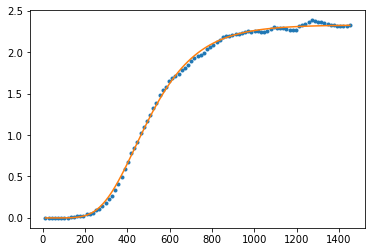

A=2.327507e+00
um=5.371510e-03
l=2.775741e+02
Tm=4.369784e+02
doubpe=1.290414e+02
ext=3.226035e+02
Tfinal=7.595819e+02


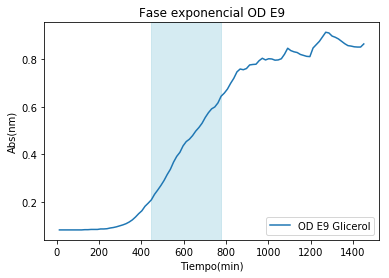

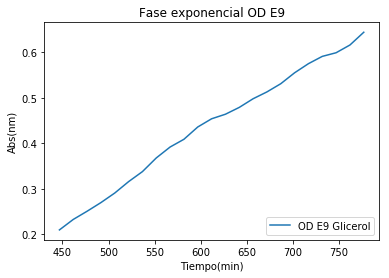

In [13]:
#E9
plt.figure()
y2 = np.log(od2)-np.log(np.min(od2))
evaly, params=Function_fit(tt,y2,0,-1)
A2 = params[0]
um2=params[1]
l2=params[2]
print('A=%e'%(A2))
print('um=%e'%(um2))
print('l=%e'%(l2))

#Cálculo datos para determinar extensión de la fase exponencial
tm2=((A2/(np.exp(1)*um2))+l2)
print('Tm=%e'%(tm2))
t22=((np.log(2))/um2)
print('doubpe=%e'%(t22))
extdp2=2.5*t22
print('ext=%e'%extdp2)
ttot2=tm2+extdp2
print('Tfinal=%e'%ttot2)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[29]
y2=tt[51]
plt.figure()
plt.title('Fase exponencial OD E9')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od2,label='OD E9 Glicerol')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD E9')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[29:52],od2[29:52],label='OD E9 Glicerol')
plt.legend(loc='lower right')

[  2.26419843e+00   4.92512198e-03   3.00000000e+02]


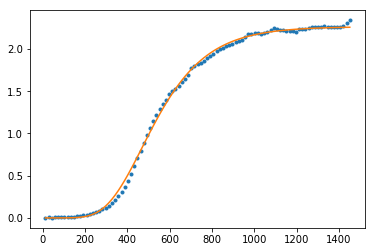

A=2.264198e+00
um=4.925122e-03
l=3.000000e+02
Tm=4.691231e+02
doubpe=1.407371e+02
ext=3.518426e+02
Tfinal=8.209658e+02


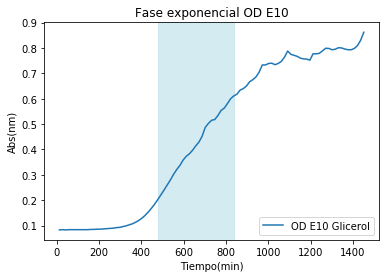

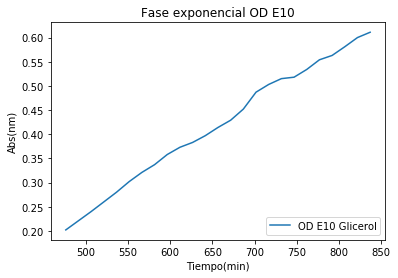

In [16]:
#E10
plt.figure()
y3= np.log(od3)-np.log(np.min(od3))
evaly, params=Function_fit(tt,y3,0,-1)
A3 = params[0]
um3=params[1]
l3=params[2]
print('A=%e'%(A3))
print('um=%e'%(um3))
print('l=%e'%(l3))

#Cálculo datos para determinar extensión de la fase exponencial
tm3=((A3/(np.exp(1)*um3))+l3)
print('Tm=%e'%(tm3))
t23=((np.log(2))/um3)
print('doubpe=%e'%(t23))
extdp3=2.5*t23
print('ext=%e'%extdp3)
ttot3=tm3+extdp3
print('Tfinal=%e'%ttot3)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[31]
y2=tt[55]
plt.figure()
plt.title('Fase exponencial OD E10')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od3,label='OD E10 Glicerol')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo A3
plt.figure()
plt.title('Fase exponencial OD E10')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[31:56],od3[31:56],label='OD E10 Glicerol')
plt.legend(loc='lower right')

[  2.37268014e+00   5.36746296e-03   3.00000000e+02]


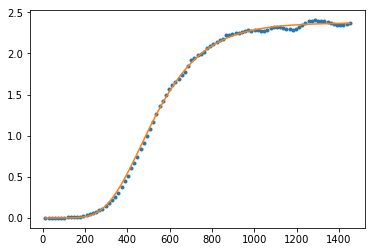

A=2.372680e+00
um=5.367463e-03
l=3.000000e+02
Tm=4.626206e+02
doubpe=1.291387e+02
ext=3.228467e+02
Tfinal=7.854674e+02


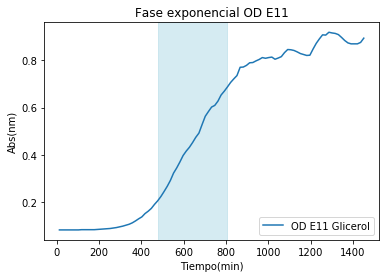

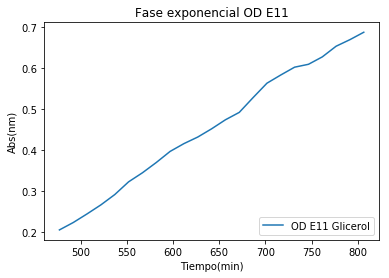

In [18]:
#E11
plt.figure()
y4 = np.log(od4)-np.log(np.min(od4))
evaly, params=Function_fit(tt,y4,0,-1)
A4 = params[0]
um4=params[1]
l4=params[2]
print('A=%e'%(A4))
print('um=%e'%(um4))
print('l=%e'%(l4))

#Cálculo datos para determinar extensión de la fase exponencial
tm4=((A4/(np.exp(1)*um4))+l4)
print('Tm=%e'%(tm4))
t24=((np.log(2))/um4)
print('doubpe=%e'%(t24))
extdp4=2.5*t24
print('ext=%e'%extdp4)
ttot4=tm4+extdp4
print('Tfinal=%e'%ttot4)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[31]
y2=tt[53]
plt.figure()
plt.title('Fase exponencial OD E11')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od4,label='OD E11 Glicerol')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD E11')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[31:54],od4[31:54],label='OD E11 Glicerol')
plt.legend(loc='lower right')

[  2.43957139e+00   5.23814014e-03   2.70913613e+02]


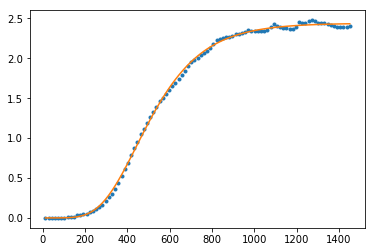

A=2.439571e+00
um=5.238140e-03
l=2.709136e+02
Tm=4.422470e+02
doubpe=1.323270e+02
ext=3.308174e+02
Tfinal=7.730644e+02


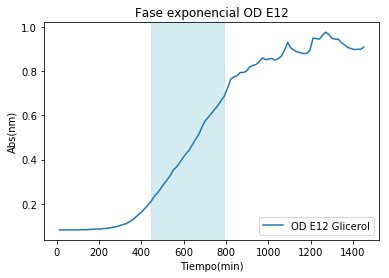

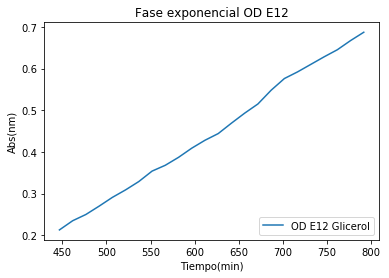

In [20]:
#E12
plt.figure()
y5 = np.log(od5)-np.log(np.min(od5))
evaly, params=Function_fit(tt,y5,0,-1)
A5 = params[0]
um5=params[1]
l5=params[2]
print('A=%e'%(A5))
print('um=%e'%(um5))
print('l=%e'%(l5))

#Cálculo datos para determinar extensión de la fase exponencial
tm5=((A5/(np.exp(1)*um5))+l5)
print('Tm=%e'%(tm5))
t25=((np.log(2))/um5)
print('doubpe=%e'%(t25))
extdp5=2.5*t25
print('ext=%e'%extdp5)
ttot5=tm5+extdp5
print('Tfinal=%e'%ttot5)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[29]
y2=tt[52]
plt.figure()
plt.title('Fase exponencial OD E12')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od5,label='OD E12 Glicerol')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD E12')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[29:53],od5[29:53],label='OD E12 Glicerol')
plt.legend(loc='lower right')

[  2.35211523e+00   5.19792263e-03   3.00000000e+02]


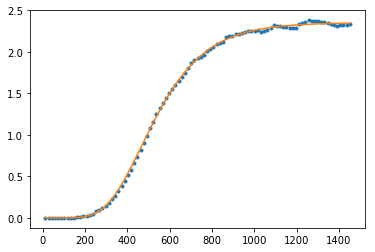

A=2.352115e+00
um=5.197923e-03
l=3.000000e+02
Tm=4.664694e+02
doubpe=1.333508e+02
ext=3.333770e+02
Tfinal=7.998464e+02


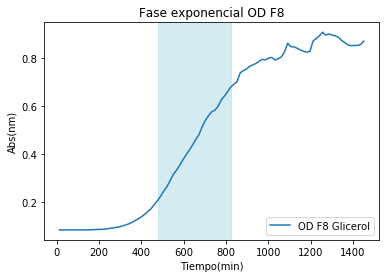

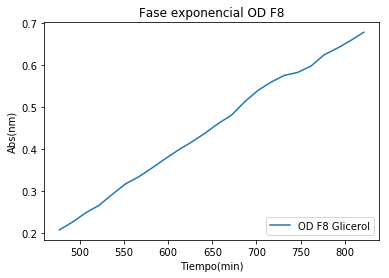

In [22]:
#F8
plt.figure()
y6 = np.log(od6)-np.log(np.min(od6))
evaly, params=Function_fit(tt,y6,0,-1)
A6 = params[0]
um6=params[1]
l6=params[2]
print('A=%e'%(A6))
print('um=%e'%(um6))
print('l=%e'%(l6))

#Cálculo datos para determinar extensión de la fase exponencial
tm6=((A6/(np.exp(1)*um6))+l6)
print('Tm=%e'%(tm6))
t26=((np.log(2))/um6)
print('doubpe=%e'%(t26))
extdp6=2.5*t26
print('ext=%e'%extdp6)
ttot6=tm6+extdp6
print('Tfinal=%e'%ttot6)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[31]
y2=tt[54]
plt.figure()
plt.title('Fase exponencial OD F8')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od6,label='OD F8 Glicerol')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD F8')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[31:55],od6[31:55],label='OD F8 Glicerol')
plt.legend(loc='lower right')

[  2.35131448e+00   4.82839750e-03   3.00000000e+02]


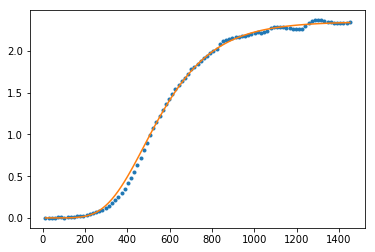

A=2.351314e+00
um=4.828398e-03
l=3.000000e+02
Tm=4.791485e+02
doubpe=1.435564e+02
ext=3.588909e+02
Tfinal=8.380394e+02


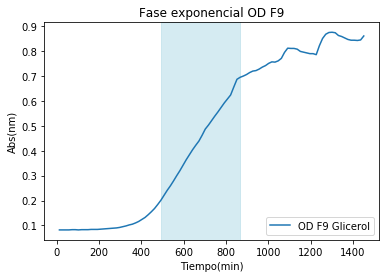

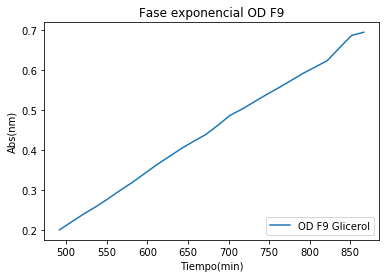

In [24]:
#F9
plt.figure()
y7 = np.log(od7)-np.log(np.min(od7))
evaly, params=Function_fit(tt,y7,0,-1)
A7 = params[0]
um7=params[1]
l7=params[2]
print('A=%e'%(A7))
print('um=%e'%(um7))
print('l=%e'%(l7))

#Cálculo datos para determinar extensión de la fase exponencial
tm7=((A7/(np.exp(1)*um7))+l7)
print('Tm=%e'%(tm7))
t27=((np.log(2))/um7)
print('doubpe=%e'%(t27))
extdp7=2.5*t27
print('ext=%e'%extdp7)
ttot7=tm7+extdp7
print('Tfinal=%e'%ttot7)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[32]
y2=tt[57]
plt.figure()
plt.title('Fase exponencial OD F9')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od7,label='OD F9 Glicerol')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD F9')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[32:58],od7[32:58],label='OD F9 Glicerol')
plt.legend(loc='lower right')

[  2.23455228e+00   4.25020427e-03   3.00000000e+02]


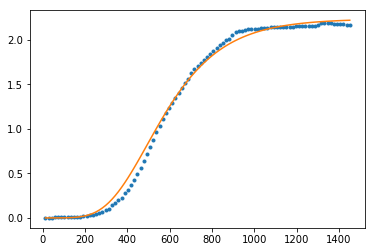

A=2.234552e+00
um=4.250204e-03
l=3.000000e+02
Tm=4.934133e+02
doubpe=1.630856e+02
ext=4.077140e+02
Tfinal=9.011273e+02


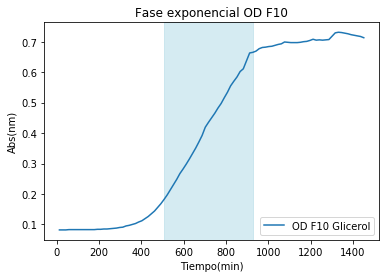

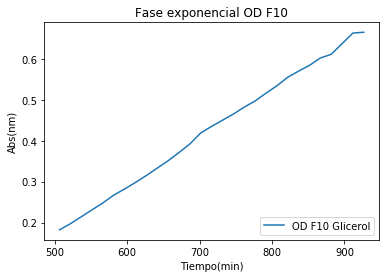

In [26]:
#F10
plt.figure()
y8= np.log(od8)-np.log(np.min(od8))
evaly, params=Function_fit(tt,y8,0,-1)
A8 = params[0]
um8=params[1]
l8=params[2]
print('A=%e'%(A8))
print('um=%e'%(um8))
print('l=%e'%(l8))

#Cálculo datos para determinar extensión de la fase exponencial
tm8=((A8/(np.exp(1)*um8))+l8)
print('Tm=%e'%(tm8))
t28=((np.log(2))/um8)
print('doubpe=%e'%(t28))
extdp8=2.5*t28
print('ext=%e'%extdp8)
ttot8=tm8+extdp8
print('Tfinal=%e'%ttot8)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[33]
y2=tt[61]
plt.figure()
plt.title('Fase exponencial OD F10')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od8,label='OD F10 Glicerol')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD F10')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[33:62],od8[33:62],label='OD F10 Glicerol')
plt.legend(loc='lower right')

[  2.23961585e+00   5.83148991e-03   2.81000500e+02]


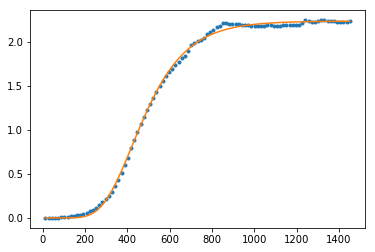

A=2.239616e+00
um=5.831490e-03
l=2.810005e+02
Tm=4.222866e+02
doubpe=1.188628e+02
ext=2.971570e+02
Tfinal=7.194436e+02


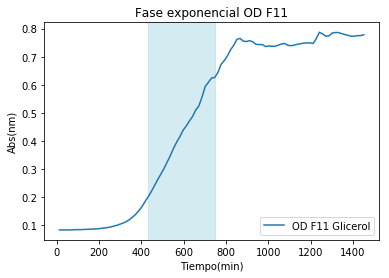

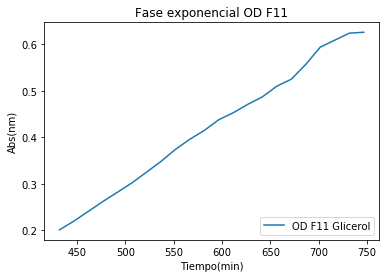

In [29]:
#F11
plt.figure()
y9= np.log(od9)-np.log(np.min(od9))
evaly, params=Function_fit(tt,y9,0,-1)
A9 = params[0]
um9=params[1]
l9=params[2]
print('A=%e'%(A9))
print('um=%e'%(um9))
print('l=%e'%(l9))

#Cálculo datos para determinar extensión de la fase exponencial
tm9=((A9/(np.exp(1)*um9))+l9)
print('Tm=%e'%(tm9))
t29=((np.log(2))/um9)
print('doubpe=%e'%(t29))
extdp9=2.5*t29
print('ext=%e'%extdp9)
ttot9=tm9+extdp9
print('Tfinal=%e'%ttot9)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[28]
y2=tt[49]
plt.figure()
plt.title('Fase exponencial OD F11')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od9,label='OD F11 Glicerol')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD F11')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[28:50],od9[28:50],label='OD F11 Glicerol')
plt.legend(loc='lower right')

[  1.72750295e+00   3.89877933e-03   3.00000000e+02]


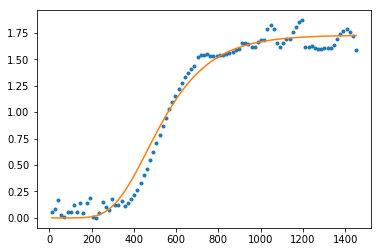

A=1.727503e+00
um=3.898779e-03
l=3.000000e+02
Tm=4.630030e+02
doubpe=1.777857e+02
ext=4.444642e+02
Tfinal=9.074673e+02


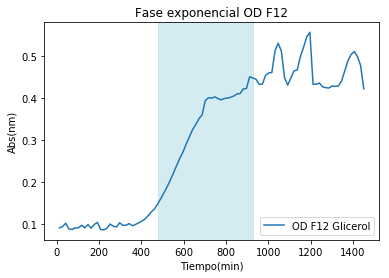

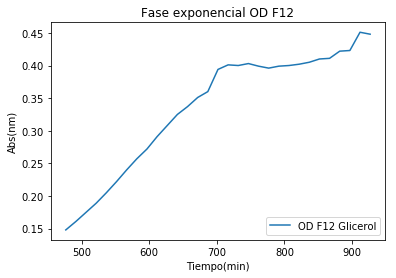

In [31]:
#F12
plt.figure()
y10= np.log(od10)-np.log(np.min(od10))
evaly, params=Function_fit(tt,y10,0,-1)
A10= params[0]
um10=params[1]
l10=params[2]
print('A=%e'%(A10))
print('um=%e'%(um10))
print('l=%e'%(l10))

#Cálculo datos para determinar extensión de la fase exponencial
tm10=((A10/(np.exp(1)*um10))+l10)
print('Tm=%e'%(tm10))
t210=((np.log(2))/um10)
print('doubpe=%e'%(t210))
extdp10=2.5*t210
print('ext=%e'%extdp10)
ttot10=tm10+extdp10
print('Tfinal=%e'%ttot10)

#Delimitación fase exponencial en grafico con OD/tiempo 
y1=tt[31]
y2=tt[61]
plt.figure()
plt.title('Fase exponencial OD F12')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt,od10,label='OD F12 Glicerol')
plt.axvspan(y1,y2, color='lightblue', alpha=0.5)
plt.legend(loc='lower right')

#Fase exponencial OD/tiempo 
plt.figure()
plt.title('Fase exponencial OD F12')
plt.xlabel('Tiempo(min)')
plt.ylabel('Abs(nm)')
plt.plot(tt[31:62],od10[31:62],label='OD F12 Glicerol')
plt.legend(loc='lower right')

In [38]:
#Selección de datos en arrays, según lo determinado
o=odp[31:55]
t=tt[31:55]
cp=cfpp[31:55]
rp=rfpp[31:55]
yp=yfpp[31:55]

#E8
o1=od1[31:55]
c1=cfp1[31:55]
r1=rfp1[31:55]
y1=yfp1[31:55]

#E9
o2=od2[29:52]
c2=cfp2[29:52]
r2=rfp2[29:52]
y2=yfp2[29:52]

#E10
o3=od3[31:56]
c3=cfp3[31:56]
r3=rfp3[31:56]
y3=yfp3[31:56]

#E11
o4=od4[31:54]
c4=cfp4[31:54]
r4=rfp4[31:54]
y4=yfp4[31:54]

#E12
o5=od5[29:53]
c5=cfp5[29:53]
r5=rfp5[29:53]
y5=yfp5[29:53]

#F8
o6=od6[31:55]
c6=cfp6[31:55]
r6=rfp6[31:55]
y6=yfp6[31:55]

#F9
o7=od7[32:58]
c7=cfp7[32:58]
r7=rfp7[32:58]
y7=yfp7[32:58]

#F10
o8=od8[33:62]
c8=cfp8[33:62]
r8=rfp8[33:62]
y8=yfp8[33:62]

#F11
o9=od9[28:50]
c9=cfp9[28:50]
r9=rfp9[28:50]
y9=yfp9[28:50]

#F12
o10=od10[31:62]
c10=cfp10[31:62]
r10=rfp10[31:62]
y10=yfp10[31:62]

#Control
oc=odc[26:50]
cc=cfpc[26:50]
rc=rfpc[26:50]
yc=yfpc[26:50]
tc=tt[26:50]

slope=1.066290e+05
intercept=-1.379134e+04
p-value=4.505407e-20
r-squared: 0.97952345401
std_err=3.286889e+03
y=(1.066290e+05)x+(-1.379134e+04)


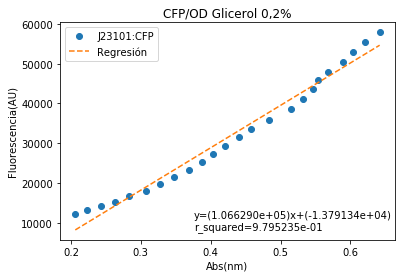

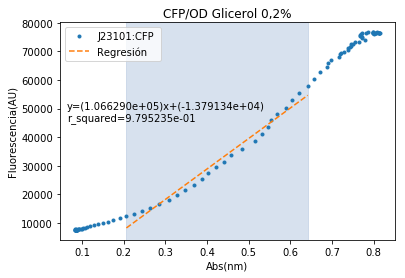

In [39]:
#Regresión lineal, evaluación de regresión con OD, gráfico de regresión (Ejemplo con CFP)
slope, intercept, r_value, p_value,std_err=stats.linregress(o,cp)
slopecp=slope
print('slope=%e'%slopecp)
print('intercept=%e'%intercept)
print('p-value=%e'%p_value)
print("r-squared:",r_value**2)
print('std_err=%e'%std_err)

regcp=((slope*o)+intercept)
print('y=(%e)x+(%e)'%(slope, intercept))
regcpstr=('y=(%e)x+(%e)'%(slope, intercept))
cprval2='r_squared=%e'%(r_value**2)

plt.figure()
plt.title('CFP/OD Glicerol 0,2%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(o,cp,'o',label='J23101:CFP')       
plt.plot(o,regcp,'--',label='Regresión')
plt.annotate(str(regcpstr), xy=(0.4, 0.1), xycoords='axes fraction')
plt.annotate(str(cprval2),xy=(0.4,0.05),xycoords='axes fraction')
plt.legend(loc='upper left')

#Delimitacion datos en CFP/OD (Ejemplo con CFP)
y1=odp[31]
y2=odp[54]
plt.figure()
plt.title('CFP/OD Glicerol 0,2%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(odp,cfpp,'.',label='J23101:CFP ')
plt.axvspan(y1,y2, color='lightsteelblue', alpha=0.5)
plt.plot(o,regcp,'--',label='Regresión')
plt.annotate(str(regcpstr), xy=(0.02, 0.6), xycoords='axes fraction')
plt.annotate(str(cprval2),xy=(0.02,0.55),xycoords='axes fraction')
plt.legend(loc='upper left')


slope=1.663770e+05
intercept=-1.759577e+04
p-value=5.151347e-16
r-squared: 0.952173164006
std_err=7.949868e+03
y=(1.663770e+05)x+(-1.759577e+04)


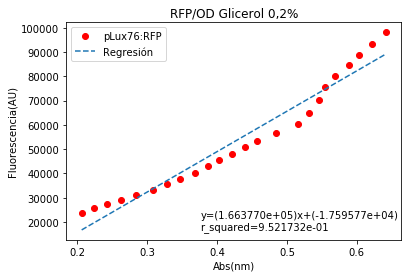

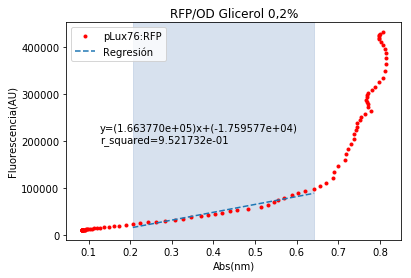

In [40]:
#RFP
slope, intercept, r_value, p_value,std_err=stats.linregress(o,rp)
sloperp=slope
print('slope=%e'%sloperp)
print('intercept=%e'%intercept)
print('p-value=%e'%p_value)
print("r-squared:",r_value**2)
print('std_err=%e'%std_err)

regrp=((slope*o)+intercept)
print('y=(%e)x+(%e)'%(slope, intercept))
regrpstr=('y=(%e)x+(%e)'%(slope, intercept))
rprval2='r_squared=%e'%(r_value**2)

plt.figure()
plt.title('RFP/OD Glicerol 0,2%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(o,rp,'ro',label='pLux76:RFP')       
plt.plot(o,regrp,'--',label='Regresión')
plt.annotate(str(regrpstr), xy=(0.4, 0.1), xycoords='axes fraction')
plt.annotate(str(rprval2),xy=(0.4,0.05),xycoords='axes fraction')
plt.legend(loc='upper left')


#Delimitacion datos en RFP/OD
y1=odp[31]
y2=odp[54]
plt.figure()
plt.title('RFP/OD Glicerol 0,2%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(odp,rfpp,'r.',label='pLux76:RFP')
plt.axvspan(y1,y2, color='lightsteelblue', alpha=0.5)
plt.plot(o,regrp,'--',label='Regresión')
plt.annotate(str(regrpstr), xy=(0.1, 0.5), xycoords='axes fraction')
plt.annotate(str(rprval2),xy=(0.1,0.45),xycoords='axes fraction')
plt.legend(loc='upper left')

slope=7.207519e+05
intercept=-8.185282e+04
p-value=4.689293e-22
r-squared: 0.986474737008
std_err=1.799303e+04
y=(7.207519e+05)x+(-8.185282e+04)


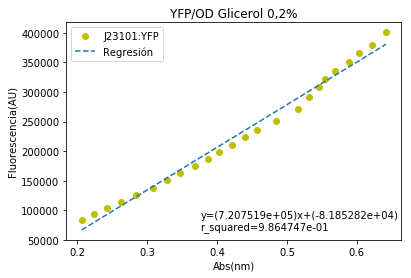

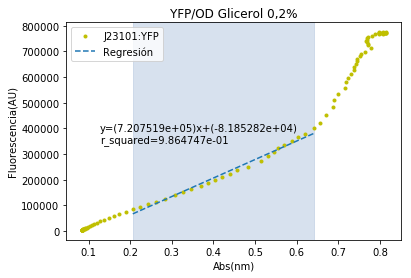

In [41]:
#YFP
slope, intercept, r_value, p_value,std_err=stats.linregress(o,yp)
slopeyp=slope
print('slope=%e'%slopeyp)
print('intercept=%e'%intercept)
print('p-value=%e'%p_value)
print("r-squared:",r_value**2)
print('std_err=%e'%std_err)

regyp=((slope*o)+intercept)
print('y=(%e)x+(%e)'%(slope, intercept))
regypstr=('y=(%e)x+(%e)'%(slope, intercept))
yprval2='r_squared=%e'%(r_value**2)

plt.figure()
plt.title('YFP/OD Glicerol 0,2%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(o,yp,'yo',label='J23101:YFP')       
plt.plot(o,regyp,'--',label='Regresión')
plt.annotate(str(regypstr), xy=(0.4, 0.1), xycoords='axes fraction')
plt.annotate(str(yprval2),xy=(0.4,0.05),xycoords='axes fraction')
plt.legend(loc='upper left')


#Delimitacion datos en YFP/OD
y1=odp[31]
y2=odp[54]
plt.figure()
plt.title('YFP/OD Glicerol 0,2%')
plt.xlabel('Abs(nm)')
plt.ylabel('Fluorescencia(AU)')
plt.plot(odp,yfpp,'y.',label='J23101:YFP')
plt.axvspan(y1,y2, color='lightsteelblue', alpha=0.5)
plt.plot(o,regyp,'--',label='Regresión')
plt.annotate(str(regypstr), xy=(0.1, 0.5), xycoords='axes fraction')
plt.annotate(str(yprval2),xy=(0.1,0.45),xycoords='axes fraction')
plt.legend(loc='upper left')


In [42]:
#E8
o1=od1[31:55]
c1=cfp1[31:55]
r1=rfp1[31:55]
y1=yfp1[31:55]

#E9
o2=od2[29:52]
c2=cfp2[29:52]
r2=rfp2[29:52]
y2=yfp2[29:52]

#E10
o3=od3[31:56]
c3=cfp3[31:56]
r3=rfp3[31:56]
y3=yfp3[31:56]

#E11
o4=od4[31:54]
c4=cfp4[31:54]
r4=rfp4[31:54]
y4=yfp4[31:54]

#E12
o5=od5[29:53]
c5=cfp5[29:53]
r5=rfp5[29:53]
y5=yfp5[29:53]

#F8
o6=od6[31:55]
c6=cfp6[31:55]
r6=rfp6[31:55]
y6=yfp6[31:55]

#F9
o7=od7[32:58]
c7=cfp7[32:58]
r7=rfp7[32:58]
y7=yfp7[32:58]

#F10
o8=od8[33:62]
c8=cfp8[33:62]
r8=rfp8[33:62]
y8=yfp8[33:62]

#F11
o9=od9[28:50]
c9=cfp9[28:50]
r9=rfp9[28:50]
y9=yfp9[28:50]

#F12
o10=od10[31:62]
c10=cfp10[31:62]
r10=rfp10[31:62]
y10=yfp10[31:62]

#Control
oc=odc[26:50]
cc=cfpc[26:50]
rc=rfpc[26:50]
yc=yfpc[26:50]
tc=tt[26:50]

In [44]:
#regresion lineal de replicas
#E8
slope, intercept, r_value, p_value,std_err=stats.linregress(o1,c1)
slopec1=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o1,r1)
sloper1=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o1,y1)
slopey1=slope

#E9
slope, intercept, r_value, p_value,std_err=stats.linregress(o2,c2)
slopec2=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o2,r2)
sloper2=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o2,y2)
slopey2=slope
#E10
slope, intercept, r_value, p_value,std_err=stats.linregress(o3,c3)
slopec3=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o3,r3)
sloper3=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o3,y3)
slopey3=slope
#E11
slope, intercept, r_value, p_value,std_err=stats.linregress(o4,c4)
slopec4=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o4,r4)
sloper4=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o4,y4)
slopey4=slope
#E12
slope, intercept, r_value, p_value,std_err=stats.linregress(o5,c5)
slopec5=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o5,r5)
sloper5=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o5,y5)
slopey5=slope
#F8
slope, intercept, r_value, p_value,std_err=stats.linregress(o6,c6)
slopec6=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o6,r6)
sloper6=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o6,y6)
slopey6=slope
#F9
slope, intercept, r_value, p_value,std_err=stats.linregress(o7,c7)
slopec7=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o7,r7)
sloper7=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o7,y7)
slopey7=slope
#F10
slope, intercept, r_value, p_value,std_err=stats.linregress(o8,c8)
slopec8=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o8,r8)
sloper8=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o8,y8)
slopey8=slope
#F11
slope, intercept, r_value, p_value,std_err=stats.linregress(o9,c9)
slopec9=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o9,r9)
sloper9=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o9,y9)
slopey9=slope
#F12
slope, intercept, r_value, p_value,std_err=stats.linregress(o10,c10)
slopec10=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o10,r10)
sloper10=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(o10,y10)
slopey10=slope

#Control
slope, intercept, r_value, p_value,std_err=stats.linregress(oc,cc)
slopecc=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(oc,rc)
sloperc=slope
slope, intercept, r_value, p_value,std_err=stats.linregress(oc,yc)
slopeyc=slope

ac [20387.130909248292, 87595.35176509303, 101160.19462421616, 93293.082802413832, 92777.082976235528, 107823.57727458693, 100591.61285039686, 122920.82174827303, 127754.84293409684, 87316.780300759783, 143018.47077426428]
ar [908.63208920898978, 118004.76933053165, 143779.28891116797, 123307.91438003319, 125281.6754944072, 141743.60107490947, 133984.17855179295, 167258.9618087385, 172040.95391494571, 114895.52517258859, 639473.71888589812]
ay [7057.2024184609381, 569464.26360250637, 686763.79759565764, 585828.03149771853, 592073.37210071937, 652881.21507532336, 639724.24540866131, 777744.98967034556, 777230.1468359729, 553641.10933453788, 1827149.2361448386]


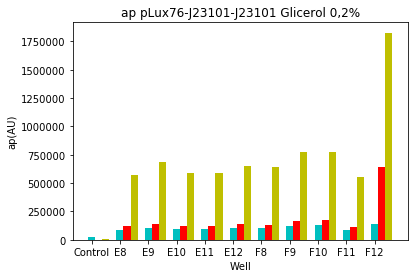

In [46]:
#Grafico de barras pendientes de FPs
pendientesc=[slopecc,slopec1,slopec2,slopec3,slopec4,slopec5,slopec6,slopec7,slopec8,slopec9,slopec10]
pendientesr=[sloperc,sloper1,sloper2,sloper3,sloper4,sloper5,sloper6,sloper7,sloper8,sloper9,sloper10]
pendientesy=[slopeyc,slopey1,slopey2,slopey3,slopey4,slopey5,slopey6,slopey7,slopey8,slopey9,slopey10]
X = np.arange(11)
plt.figure()
plt.title('ap pLux76-J23101-J23101 Glicerol 0,2%')
plt.xlabel('Well')
plt.ylabel('ap(AU)')
plt.bar(X[0]+0.00,pendientesc[0],color='c',width=0.25)
plt.bar(X[0]+0.25,pendientesr[0],color='r',width=0.25)
plt.bar(X[0]+0.50,pendientesy[0],color='y',width=0.25)
plt.bar(X[1]+0.00,pendientesc[1],color='c',width=0.25)
plt.bar(X[1]+0.25,pendientesr[1],color='r',width=0.25)
plt.bar(X[1]+0.50,pendientesy[1],color='y',width=0.25)
plt.bar(X[2]+0.00,pendientesc[2],color='c',width=0.25)
plt.bar(X[2]+0.25,pendientesr[2],color='r',width=0.25)
plt.bar(X[2]+0.50,pendientesy[2],color='y',width=0.25)
plt.bar(X[3]+0.00,pendientesc[3],color='c',width=0.25)
plt.bar(X[3]+0.25,pendientesr[3],color='r',width=0.25)
plt.bar(X[3]+0.50,pendientesy[3],color='y',width=0.25)
plt.bar(X[4]+0.00,pendientesc[4],color='c',width=0.25)
plt.bar(X[4]+0.25,pendientesr[4],color='r',width=0.25)
plt.bar(X[4]+0.50,pendientesy[4],color='y',width=0.25)
plt.bar(X[5]+0.00,pendientesc[5],color='c',width=0.25)
plt.bar(X[5]+0.25,pendientesr[5],color='r',width=0.25)
plt.bar(X[5]+0.50,pendientesy[5],color='y',width=0.25)
plt.bar(X[6]+0.00,pendientesc[6],color='c',width=0.25)
plt.bar(X[6]+0.25,pendientesr[6],color='r',width=0.25)
plt.bar(X[6]+0.50,pendientesy[6],color='y',width=0.25)
plt.bar(X[7]+0.00,pendientesc[7],color='c',width=0.25)
plt.bar(X[7]+0.25,pendientesr[7],color='r',width=0.25)
plt.bar(X[7]+0.50,pendientesy[7],color='y',width=0.25)
plt.bar(X[8]+0.00,pendientesc[8],color='c',width=0.25)
plt.bar(X[8]+0.25,pendientesr[8],color='r',width=0.25)
plt.bar(X[8]+0.50,pendientesy[8],color='y',width=0.25)
plt.bar(X[9]+0.00,pendientesc[9],color='c',width=0.25)
plt.bar(X[9]+0.25,pendientesr[9],color='r',width=0.25)
plt.bar(X[9]+0.50,pendientesy[9],color='y',width=0.25)
plt.bar(X[10]+0.00,pendientesc[10],color='c',width=0.25)
plt.bar(X[10]+0.25,pendientesr[10],color='r',width=0.25)
plt.bar(X[10]+0.50,pendientesy[10],color='y',width=0.25)
plt.xticks(X, ['Control',"E8","E9","E10",'E11','E12','F8','F9','F10','F11','F12'])

print('ac',pendientesc)
print('ar',pendientesr)
print('ay',pendientesy)

([<matplotlib.axis.XTick at 0x1e4948c73c8>,
 <a list of 3 Text xticklabel objects>)

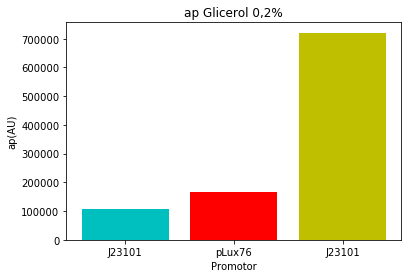

In [47]:
pendientes= [slopecp,sloperp,slopeyp]
X = [1,2,3]
plt.figure()
plt.title('ap Glicerol 0,2%')
plt.xlabel('Promotor')
plt.ylabel('ap(AU)')
plt.bar(X[0],pendientes[0],color='c')
plt.bar(X[1],pendientes[1],color='r')
plt.bar(X[2],pendientes[2],color='y')
plt.xticks(X, ["J23101",'pLux76',"J23101"])

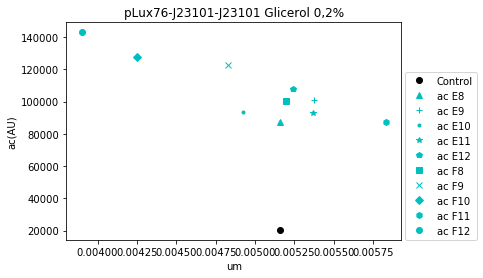

In [48]:
#grafico de ac versus Um
plt.figure()
plt.title('pLux76-J23101-J23101 Glicerol 0,2%')
plt.xlabel('um')
plt.ylabel('ac(AU)')
plt.plot(umc,slopecc,'ko',label='Control')
plt.plot(um1,slopec1,'c^',label='ac E8')
plt.plot(um2,slopec2,'c+',label='ac E9')
plt.plot(um3,slopec3,'c.',label='ac E10')
plt.plot(um4,slopec4,'c*',label='ac E11')
plt.plot(um5,slopec5,'cp',label='ac E12')
plt.plot(um6,slopec6,'cs',label='ac F8')
plt.plot(um7,slopec7,'cx',label='ac F9')
plt.plot(um8,slopec8,'cD',label='ac F10')
plt.plot(um9,slopec9,'ch',label='ac F11')
plt.plot(um10,slopec10,'co',label='ac F12')
plt.legend(loc=(1.01,0.0))

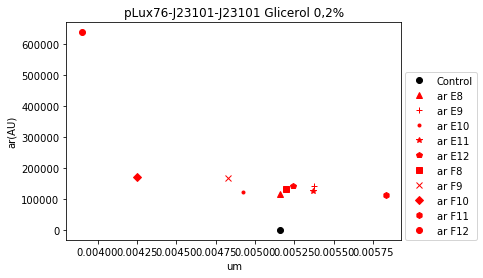

In [49]:
#grafico de ar versus Um
plt.figure()
plt.title('pLux76-J23101-J23101 Glicerol 0,2%')
plt.xlabel('um')
plt.ylabel('ar(AU)')
plt.plot(umc,sloperc,'ko',label='Control')
plt.plot(um1,sloper1,'r^',label='ar E8')
plt.plot(um2,sloper2,'r+',label='ar E9')
plt.plot(um3,sloper3,'r.',label='ar E10')
plt.plot(um4,sloper4,'r*',label='ar E11')
plt.plot(um5,sloper5,'rp',label='ar E12')
plt.plot(um6,sloper6,'rs',label='ar F8')
plt.plot(um7,sloper7,'rx',label='ar F9')
plt.plot(um8,sloper8,'rD',label='ar F10')
plt.plot(um9,sloper9,'rh',label='ar F11')
plt.plot(um10,sloper10,'ro',label='ar F12')
plt.legend(loc=(1.01,0.0))

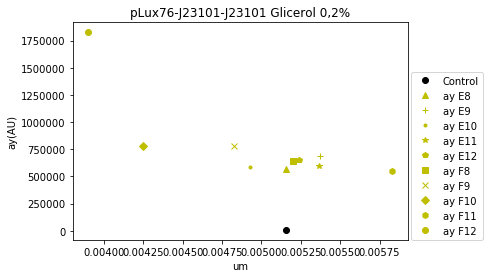

In [50]:
#grafico de ay versus Um
plt.figure()
plt.title('pLux76-J23101-J23101 Glicerol 0,2%')
plt.xlabel('um')
plt.ylabel('ay(AU)')
plt.plot(umc,slopeyc,'ko',label='Control')
plt.plot(um1,slopey1,'y^',label='ay E8')
plt.plot(um2,slopey2,'y+',label='ay E9')
plt.plot(um3,slopey3,'y.',label='ay E10')
plt.plot(um4,slopey4,'y*',label='ay E11')
plt.plot(um5,slopey5,'yp',label='ay E12')
plt.plot(um6,slopey6,'ys',label='ay F8')
plt.plot(um7,slopey7,'yx',label='ay F9')
plt.plot(um8,slopey8,'yD',label='ay F10')
plt.plot(um9,slopey9,'yh',label='ay F11')
plt.plot(um10,slopey10,'yo',label='ay F12')
plt.legend(loc=(1.01,0.0))

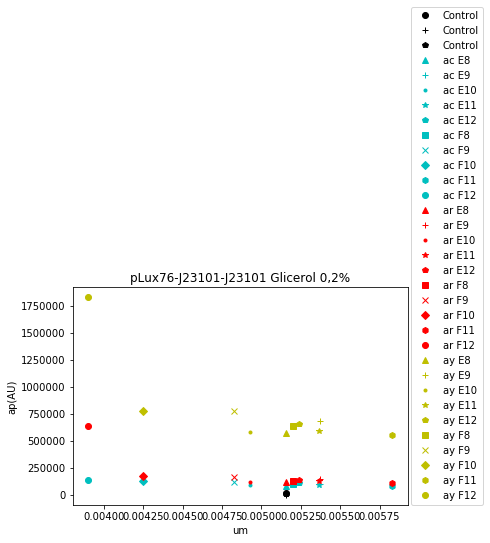

In [51]:
#grafico de ap versus Um
plt.figure()
plt.title('pLux76-J23101-J23101 Glicerol 0,2%')
plt.xlabel('um')
plt.ylabel('ap(AU)')
plt.plot(umc,slopecc,'ko',label='Control')
plt.plot(umc,sloperc,'k+',label='Control')
plt.plot(umc,slopeyc,'kp',label='Control')
plt.plot(um1,slopec1,'c^',label='ac E8')
plt.plot(um2,slopec2,'c+',label='ac E9')
plt.plot(um3,slopec3,'c.',label='ac E10')
plt.plot(um4,slopec4,'c*',label='ac E11')
plt.plot(um5,slopec5,'cp',label='ac E12')
plt.plot(um6,slopec6,'cs',label='ac F8')
plt.plot(um7,slopec7,'cx',label='ac F9')
plt.plot(um8,slopec8,'cD',label='ac F10')
plt.plot(um9,slopec9,'ch',label='ac F11')
plt.plot(um10,slopec10,'co',label='ac F12')
plt.plot(um1,sloper1,'r^',label='ar E8')
plt.plot(um2,sloper2,'r+',label='ar E9')
plt.plot(um3,sloper3,'r.',label='ar E10')
plt.plot(um4,sloper4,'r*',label='ar E11')
plt.plot(um5,sloper5,'rp',label='ar E12')
plt.plot(um6,sloper6,'rs',label='ar F8')
plt.plot(um7,sloper7,'rx',label='ar F9')
plt.plot(um8,sloper8,'rD',label='ar F10')
plt.plot(um9,sloper9,'rh',label='ar F11')
plt.plot(um10,sloper10,'ro',label='ar F12')
plt.plot(um1,slopey1,'y^',label='ay E8')
plt.plot(um2,slopey2,'y+',label='ay E9')
plt.plot(um3,slopey3,'y.',label='ay E10')
plt.plot(um4,slopey4,'y*',label='ay E11')
plt.plot(um5,slopey5,'yp',label='ay E12')
plt.plot(um6,slopey6,'ys',label='ay F8')
plt.plot(um7,slopey7,'yx',label='ay F9')
plt.plot(um8,slopey8,'yD',label='ay F10')
plt.plot(um9,slopey9,'yh',label='ay F11')
plt.plot(um10,slopey10,'yo',label='ay F12')
plt.legend(loc=(1.01,0.0))

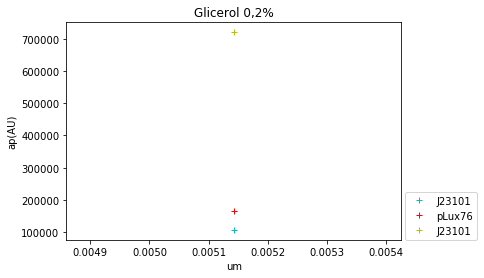

In [52]:
#grafico de ay versus Um
plt.figure()
plt.title('Glicerol 0,2%')
plt.xlabel('um')
plt.ylabel('ap(AU)')
plt.plot(um,slopecp,'c+',label='J23101')
plt.plot(um,sloperp,'r+',label='pLux76')
plt.plot(um,slopeyp,'y+',label='J23101')
plt.legend(loc=(1.01,0.0))

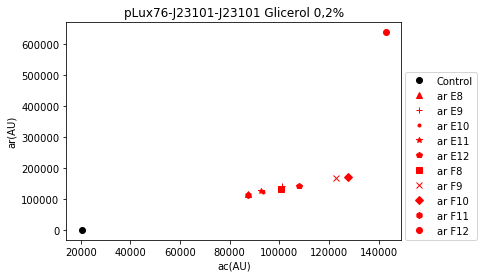

In [53]:
#grafico de ar versus ac
plt.figure()
plt.title('pLux76-J23101-J23101 Glicerol 0,2%')
plt.xlabel('ac(AU)')
plt.ylabel('ar(AU)')
plt.plot(slopecc,sloperc,'ko',label='Control')
plt.plot(slopec1,sloper1,'r^',label='ar E8')
plt.plot(slopec2,sloper2,'r+',label='ar E9')
plt.plot(slopec3,sloper3,'r.',label='ar E10')
plt.plot(slopec4,sloper4,'r*',label='ar E11')
plt.plot(slopec5,sloper5,'rp',label='ar E12')
plt.plot(slopec6,sloper6,'rs',label='ar F8')
plt.plot(slopec7,sloper7,'rx',label='ar F9')
plt.plot(slopec8,sloper8,'rD',label='ar F10')
plt.plot(slopec9,sloper9,'rh',label='ar F11')
plt.plot(slopec10,sloper10,'ro',label='ar F12')
plt.legend(loc=(1.01,0.0))

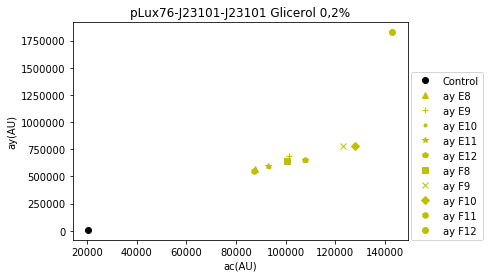

In [56]:
#grafico de ay versus ac
plt.figure()
plt.title('pLux76-J23101-J23101 Glicerol 0,2%')
plt.xlabel('ac(AU)')
plt.ylabel('ay(AU)')
plt.plot(slopecc,slopeyc,'ko',label='Control')
plt.plot(slopec1,slopey1,'y^',label='ay E8')
plt.plot(slopec2,slopey2,'y+',label='ay E9')
plt.plot(slopec3,slopey3,'y.',label='ay E10')
plt.plot(slopec4,slopey4,'y*',label='ay E11')
plt.plot(slopec5,slopey5,'yp',label='ay E12')
plt.plot(slopec6,slopey6,'ys',label='ay F8')
plt.plot(slopec7,slopey7,'yx',label='ay F9')
plt.plot(slopec8,slopey8,'yD',label='ay F10')
plt.plot(slopec9,slopey9,'yh',label='ay F11')
plt.plot(slopec10,slopey10,'yo',label='ay F12')
plt.legend(loc=(1.01,0.0))

um [0.0051585808276074186, 0.0051577307033722364, 0.005371509618396937, 0.004925121980843248, 0.0053674629624005854, 0.0052381401384792034, 0.0051979226281850957, 0.0048283975024728497, 0.0042502042747347788, 0.0058314899107552165, 0.0038987793326511772]


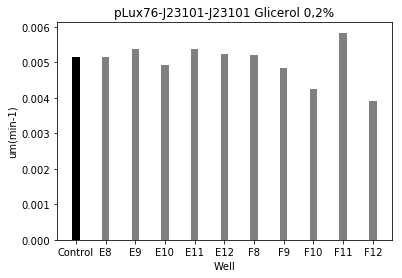

In [57]:
#Grafico de barras um de FPs
ums=[umc,um1,um2,um3,um4,um5,um6,um7,um8,um9,um10]
X = np.arange(11)
plt.figure()
plt.title('pLux76-J23101-J23101 Glicerol 0,2%')
plt.xlabel('Well')
plt.ylabel('um(min-1)')
plt.bar(X[0]+0.00,ums[0],color='k',width=0.25)
plt.bar(X[1]+0.00,ums[1],color='grey',width=0.25)
plt.bar(X[2]+0.00,ums[2],color='grey',width=0.25)
plt.bar(X[3]+0.00,ums[3],color='grey',width=0.25)
plt.bar(X[4]+0.00,ums[4],color='grey',width=0.25)
plt.bar(X[5]+0.00,ums[5],color='grey',width=0.25)
plt.bar(X[6]+0.00,ums[6],color='grey',width=0.25)
plt.bar(X[7]+0.00,ums[7],color='grey',width=0.25)
plt.bar(X[8]+0.00,ums[8],color='grey',width=0.25)
plt.bar(X[9]+0.00,ums[9],color='grey',width=0.25)
plt.bar(X[10]+0.00,ums[10],color='grey',width=0.25)
plt.xticks(X, ['Control',"E8","E9","E10",'E11','E12','F8','F9','F10','F11','F12'])
print('um',ums)

In [58]:
#Calculo de ro para cada réplica
pendientesc=[slopecp,slopecc,slopec1,slopec2,slopec3,slopec4,slopec5,slopec6,slopec7,slopec8,slopec9,slopec10]
pendientesr=[sloperp,sloperc,sloper1,sloper2,sloper3,sloper4,sloper5,sloper6,sloper7,sloper8,sloper9,sloper10]
pendientesy=[slopeyp,slopeyc,slopey1,slopey2,slopey3,slopey4,slopey5,slopey6,slopey7,slopey8,slopey9,slopey10]
#Ro RFP 
pr1=sloper1/slopec1
pr2=sloper2/slopec2
pr3=sloper3/slopec3
pr4=sloper4/slopec4
pr5=sloper5/slopec5
pr6=sloper6/slopec6
pr7=sloper7/slopec7
pr8=sloper8/slopec8
pr9=sloper9/slopec9
pr10=sloper10/slopec10
prp=sloperp/slopecp
prc=sloperc/slopecc

#Ro YFP
py1=slopey1/slopec1
py2=slopey2/slopec2
py3=slopey3/slopec3
py4=slopey4/slopec4
py5=slopey5/slopec5
py6=slopey6/slopec6
py7=slopey7/slopec7
py8=slopey8/slopec8
py9=slopey9/slopec9
py10=slopey10/slopec10
pyp=slopeyp/slopecp
pyc=slopeyc/slopecc

ro_rfp=[prc,pr1,pr2,pr3,pr4,pr5,pr6,pr7,pr8,pr9,pr10]
ro_yfp=[pyc,py1,py2,py3,py4,py5,py6,py7,py8,py9,py10]


pr [0.044568904435533081, 1.3471578908317925, 1.4213030080188227, 1.3217262274544836, 1.3503515251336107, 1.3145881880169932, 1.3319617287681689, 1.3607048783912674, 1.3466491755908945, 1.3158470202043036, 4.471266651251101]
py [0.34615966561825295, 6.5010785632741683, 6.788873826773532, 6.2794369518096902, 6.3816769519728975, 6.0550876865518513, 6.3596181359581152, 6.3272029800050733, 6.0837626894262788, 6.3406038040745347, 12.77561720701623]


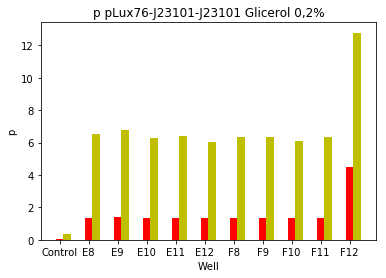

In [59]:
#grafico ro de yfp y de rfp
ro_rfp=[prc,pr1,pr2,pr3,pr4,pr5,pr6,pr7,pr8,pr9,pr10]
ro_yfp=[pyc,py1,py2,py3,py4,py5,py6,py7,py8,py9,py10]
X = np.arange(11)
plt.figure()
plt.title('p pLux76-J23101-J23101 Glicerol 0,2%')
plt.xlabel('Well')
plt.ylabel('p')
plt.bar(X[0]+0.00,ro_rfp[0],color='r',width=0.25)
plt.bar(X[0]+0.25,ro_yfp[0],color='y',width=0.25)
plt.bar(X[1]+0.00,ro_rfp[1],color='r',width=0.25)
plt.bar(X[1]+0.25,ro_yfp[1],color='y',width=0.25)
plt.bar(X[2]+0.00,ro_rfp[2],color='r',width=0.25)
plt.bar(X[2]+0.25,ro_yfp[2],color='y',width=0.25)
plt.bar(X[3]+0.00,ro_rfp[3],color='r',width=0.25)
plt.bar(X[3]+0.25,ro_yfp[3],color='y',width=0.25)
plt.bar(X[4]+0.00,ro_rfp[4],color='r',width=0.25)
plt.bar(X[4]+0.25,ro_yfp[4],color='y',width=0.25)
plt.bar(X[5]+0.00,ro_rfp[5],color='r',width=0.25)
plt.bar(X[5]+0.25,ro_yfp[5],color='y',width=0.25)
plt.bar(X[6]+0.00,ro_rfp[6],color='r',width=0.25)
plt.bar(X[6]+0.25,ro_yfp[6],color='y',width=0.25)
plt.bar(X[7]+0.00,ro_rfp[7],color='r',width=0.25)
plt.bar(X[7]+0.25,ro_yfp[7],color='y',width=0.25)
plt.bar(X[8]+0.00,ro_rfp[8],color='r',width=0.25)
plt.bar(X[8]+0.25,ro_yfp[8],color='y',width=0.25)
plt.bar(X[9]+0.00,ro_rfp[9],color='r',width=0.25)
plt.bar(X[9]+0.25,ro_yfp[9],color='y',width=0.25)
plt.bar(X[10]+0.00,ro_rfp[10],color='r',width=0.25)
plt.bar(X[10]+0.25,ro_yfp[10],color='y',width=0.25)
plt.xticks(X, ['Control',"E8","E9","E10",'E11','E12','F8','F9','F10','F11','F12'])

print('pr',ro_rfp)
print('py',ro_yfp)

A=2.365882e+00
um=5.157731e-03
l=3.000000e+02


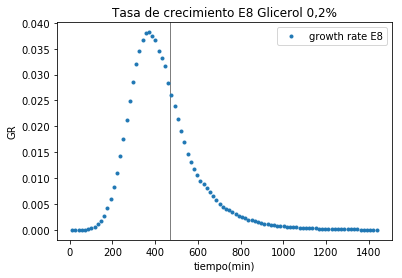

In [60]:
#tasa de crecimiento
#E8
print('A=%e'%(A1))
print('um=%e'%(um1))
print('l=%e'%(l1))
y1=((A1*np.exp(-np.exp((((um1*np.exp(1))/A1)*(l1-tt))+1))))
#Con diff
dy1=(1/od1[:-1])*(np.diff(y1)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento E8 Glicerol 0,2%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm1,tm1, color='k', alpha=0.5)
plt.plot(tt[:-1],dy1,'.',label='growth rate E8')
plt.legend(loc='upper right')

A=2.327507e+00
um=5.371510e-03
l=2.775741e+02


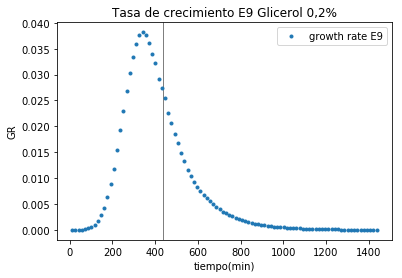

In [61]:
#tasa de crecimiento
#E9
print('A=%e'%(A2))
print('um=%e'%(um2))
print('l=%e'%(l2))
y2=((A2*np.exp(-np.exp((((um2*np.exp(1))/A2)*(l2-tt))+1))))
#Con diff
dy2=(1/od2[:-1])*(np.diff(y2)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento E9 Glicerol 0,2%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm2,tm2, color='k', alpha=0.5)
plt.plot(tt[:-1],dy2,'.',label='growth rate E9')
plt.legend(loc='upper right')

A=2.264198e+00
um=4.925122e-03
l=3.000000e+02


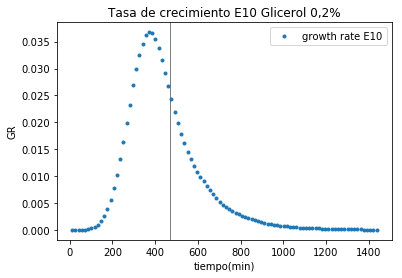

In [62]:
#tasa de crecimiento
#E10
print('A=%e'%(A3))
print('um=%e'%(um3))
print('l=%e'%(l3))
y3=((A3*np.exp(-np.exp((((um3*np.exp(1))/A3)*(l3-tt))+1))))
#Con diff
dy3=(1/od3[:-1])*(np.diff(y3)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento E10 Glicerol 0,2%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm3,tm3, color='k', alpha=0.5)
plt.plot(tt[:-1],dy3,'.',label='growth rate E10')
plt.legend(loc='upper right')

A=2.372680e+00
um=5.367463e-03
l=3.000000e+02


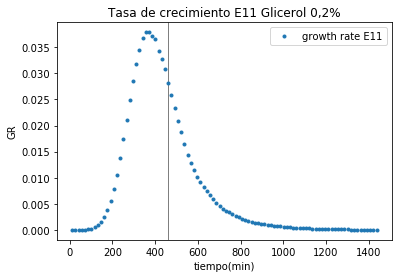

In [63]:
#tasa de crecimiento
#E11
print('A=%e'%(A4))
print('um=%e'%(um4))
print('l=%e'%(l4))
y4=((A4*np.exp(-np.exp((((um4*np.exp(1))/A4)*(l4-tt))+1))))
#Con diff
dy4=(1/od4[:-1])*(np.diff(y4)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento E11 Glicerol 0,2%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm4,tm4, color='k', alpha=0.5)
plt.plot(tt[:-1],dy4,'.',label='growth rate E11')
plt.legend(loc='upper right')

A=2.439571e+00
um=5.238140e-03
l=2.709136e+02


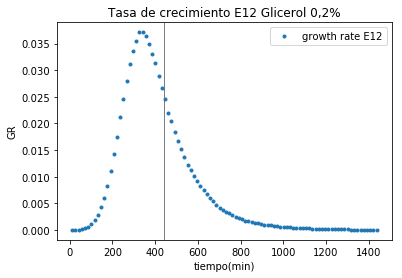

In [64]:
    #tasa de crecimiento
    #E12
    print('A=%e'%(A5))
    print('um=%e'%(um5))
    print('l=%e'%(l5))
    y5=((A5*np.exp(-np.exp((((um5*np.exp(1))/A5)*(l5-tt))+1))))
    #Con diff
    dy5=(1/od5[:-1])*(np.diff(y5)/np.diff(tt))
    plt.figure()
    plt.title('Tasa de crecimiento E12 Glicerol 0,2%')
    plt.xlabel('tiempo(min)')
    plt.ylabel('GR')
    plt.axvspan(tm5,tm5, color='k', alpha=0.5)
    plt.plot(tt[:-1],dy5,'.',label='growth rate E12')
    plt.legend(loc='upper right')

A=2.352115e+00
um=5.197923e-03
l=3.000000e+02


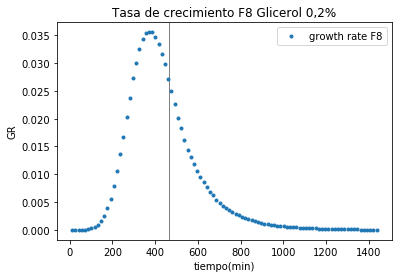

In [65]:
#tasa de crecimiento
#F8
print('A=%e'%(A6))
print('um=%e'%(um6))
print('l=%e'%(l6))
y6=((A6*np.exp(-np.exp((((um6*np.exp(1))/A6)*(l6-tt))+1))))
#Con diff
dy6=(1/od6[:-1])*(np.diff(y6)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento F8 Glicerol 0,2%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm6,tm6, color='k', alpha=0.5)
plt.plot(tt[:-1],dy6,'.',label='growth rate F8')
plt.legend(loc='upper right')

A=2.351314e+00
um=4.828398e-03
l=3.000000e+02


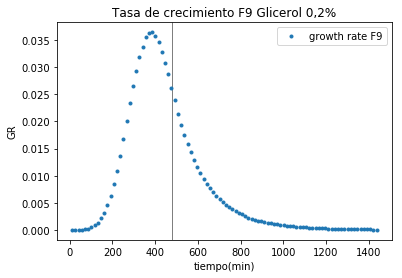

In [66]:
#F9
print('A=%e'%(A7))
print('um=%e'%(um7))
print('l=%e'%(l7))
y7=((A7*np.exp(-np.exp((((um7*np.exp(1))/A7)*(l7-tt))+1))))
#Con diff
dy7=(1/od7[:-1])*(np.diff(y7)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento F9 Glicerol 0,2%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm7,tm7, color='k', alpha=0.5)
plt.plot(tt[:-1],dy7,'.',label='growth rate F9')
plt.legend(loc='upper right')

A=2.234552e+00
um=4.250204e-03
l=3.000000e+02


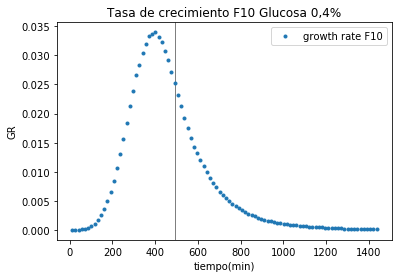

In [67]:
#tasa de crecimiento
#F10
print('A=%e'%(A8))
print('um=%e'%(um8))
print('l=%e'%(l8))
y8=((A8*np.exp(-np.exp((((um8*np.exp(1))/A8)*(l8-tt))+1))))
#Con diff
dy8=(1/od8[:-1])*(np.diff(y8)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento F10 Glucosa 0,4%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm8,tm8, color='k', alpha=0.5)
plt.plot(tt[:-1],dy8,'.',label='growth rate F10')
plt.legend(loc='upper right')

A=2.239616e+00
um=5.831490e-03
l=2.810005e+02


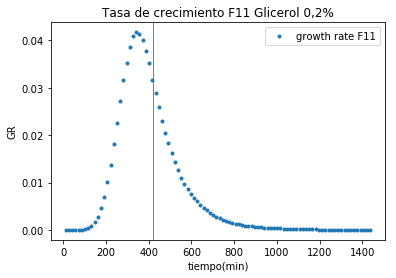

In [68]:
#tasa de crecimiento
#F11
print('A=%e'%(A9))
print('um=%e'%(um9))
print('l=%e'%(l9))
y9=((A9*np.exp(-np.exp((((um9*np.exp(1))/A9)*(l9-tt))+1))))
#Con diff
dy9=(1/od9[:-1])*(np.diff(y9)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento F11 Glicerol 0,2%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm9,tm9, color='k', alpha=0.5)
plt.plot(tt[:-1],dy9,'.',label='growth rate F11')
plt.legend(loc='upper right')

A=1.727503e+00
um=3.898779e-03
l=3.000000e+02


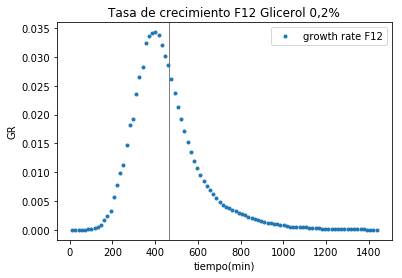

In [76]:
#tasa de crecimiento
#F12
print('A=%e'%(A10))
print('um=%e'%(um10))
print('l=%e'%(l10))
y10=((A10*np.exp(-np.exp((((um10*np.exp(1))/A10)*(l10-tt))+1))))
#Con diff
dy10=(1/od10[:-1])*(np.diff(y10)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento F12 Glicerol 0,2%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm10,tm10, color='k', alpha=0.5)
plt.plot(tt[:-1],dy10,'.',label='growth rate F12')
plt.legend(loc='upper right')

A=2.224704e+00
um=5.158581e-03
l=2.320969e+02


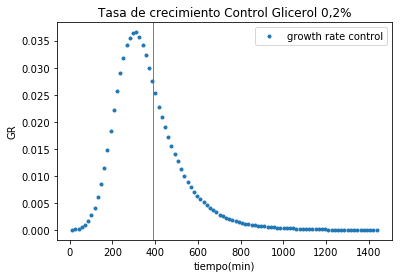

In [70]:
#tasa de crecimiento
#control
print('A=%e'%(Ac))
print('um=%e'%(umc))
print('l=%e'%(lc))
yc=((Ac*np.exp(-np.exp((((umc*np.exp(1))/Ac)*(lc-tt))+1))))
#Con diff
dyc=(1/odc[:-1])*(np.diff(yc)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento Control Glicerol 0,2%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tmc,tmc, color='k', alpha=0.5)
plt.plot(tt[:-1],dyc,'.',label='growth rate control')
plt.legend(loc='upper right')

A=2.269490e+00
um=5.142622e-03
l=3.000000e+02


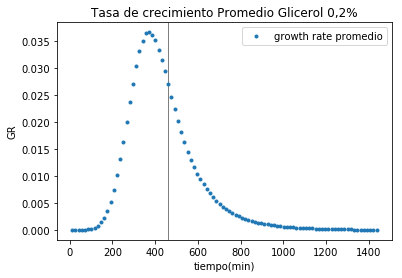

In [71]:
#tasa de crecimiento
#promedio
print('A=%e'%(A))
print('um=%e'%(um))
print('l=%e'%(l))
y=((A*np.exp(-np.exp((((um*np.exp(1))/A)*(l-tt))+1))))
#Con diff
dy=(1/odp[:-1])*(np.diff(y)/np.diff(tt))
plt.figure()
plt.title('Tasa de crecimiento Promedio Glicerol 0,2%')
plt.xlabel('tiempo(min)')
plt.ylabel('GR')
plt.axvspan(tm,tm, color='k', alpha=0.5)
plt.plot(tt[:-1],dy,'.',label='growth rate promedio')
plt.legend(loc='upper right')

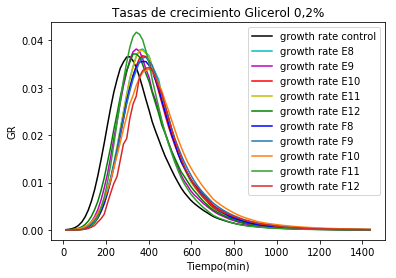

In [72]:
plt.figure()
plt.title('Tasas de crecimiento Glicerol 0,2%')
plt.xlabel('Tiempo(min)')
plt.ylabel('GR')
plt.plot(tt[:-1],dyc,'k',label='growth rate control')
plt.plot(tt[:-1],dy1,'c',label='growth rate E8')
plt.plot(tt[:-1],dy2,'m',label='growth rate E9')
plt.plot(tt[:-1],dy3,'r',label='growth rate E10')
plt.plot(tt[:-1],dy4,'y',label='growth rate E11')
plt.plot(tt[:-1],dy5,'g',label='growth rate E12')
plt.plot(tt[:-1],dy6,'b',label='growth rate F8')
plt.plot(tt[:-1],dy7,label='growth rate F9')
plt.plot(tt[:-1],dy8,label='growth rate F10')
plt.plot(tt[:-1],dy9,label='growth rate F11')
plt.plot(tt[:-1],dy10,label='growth rate F12')
plt.legend(loc='upper right')

In [73]:
#tasas de síntesis para replicas contra od y tiempo
dt=np.diff(tt)
#A8
dc1=np.diff(cfp1)
dr1=np.diff(rfp1)
dy1=np.diff(yfp1)
#A9
dc2=np.diff(cfp2)
dr2=np.diff(rfp2)
dy2=np.diff(yfp2)
#A10
dc3=np.diff(cfp3)
dr3=np.diff(rfp3)
dy3=np.diff(yfp3)
#A11
dc4=np.diff(cfp4)
dr4=np.diff(rfp4)
dy4=np.diff(yfp4)
#A12
dc5=np.diff(cfp5)
dr5=np.diff(rfp5)
dy5=np.diff(yfp5)
#B8
dc6=np.diff(cfp6)
dr6=np.diff(rfp6)
dy6=np.diff(yfp6)
#B9
dc7=np.diff(cfp7)
dr7=np.diff(rfp7)
dy7=np.diff(yfp7)
#B10
dc8=np.diff(cfp8)
dr8=np.diff(rfp8)
dy8=np.diff(yfp8)
#B11
dc9=np.diff(cfp9)
dr9=np.diff(rfp9)
dy9=np.diff(yfp9)
#B12
dc10=np.diff(cfp10)
dr10=np.diff(rfp10)
dy10=np.diff(yfp10)
#PROMEDIO
dcp=np.diff(cfpp)
drp=np.diff(rfpp)
dyp=np.diff(yfpp)
#CONTROL
dcc=np.diff(cfpc)
drc=np.diff(rfpc)
dyc=np.diff(yfpc)
